In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
mlr=pd.read_csv("ToyotaCorollaMLR.csv")
mlr.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
mlr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


#### Performing EDA(Exploratory data analysis)

In [5]:
# identifying missing values
mlr.isnull()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,False


In [6]:
mlr.isnull().sum()
# no null values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
mlr.isnull().values.any()
#if any missing  values prestent it will let know

np.False_

In [8]:
# identifing numerical columns
data1 = mlr.select_dtypes(include=['int64', 'float64']).columns
print(data1)



Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')


#### Visualise the data

##### A.check for outliers

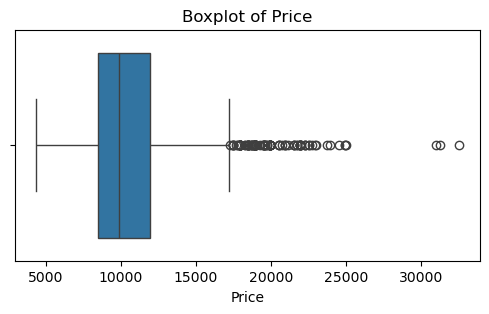

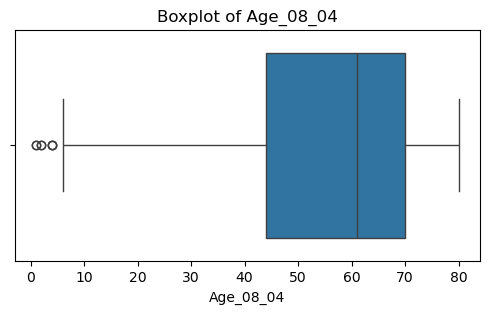

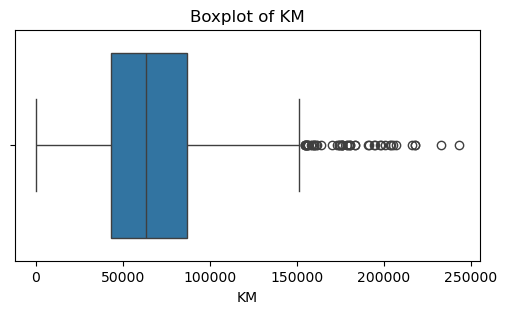

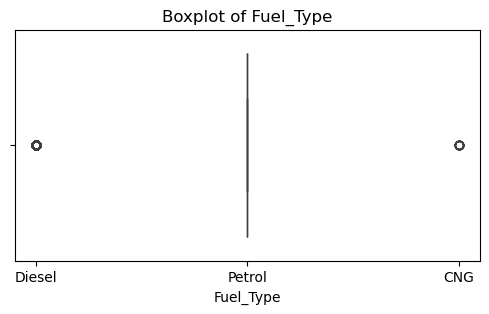

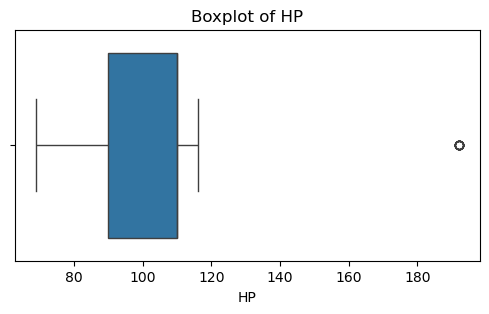

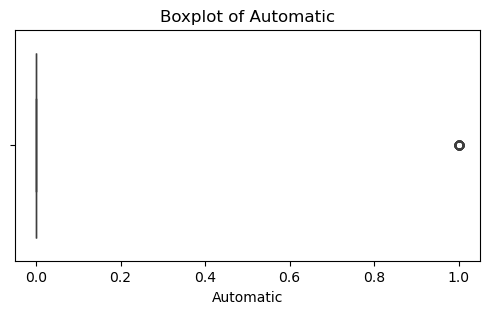

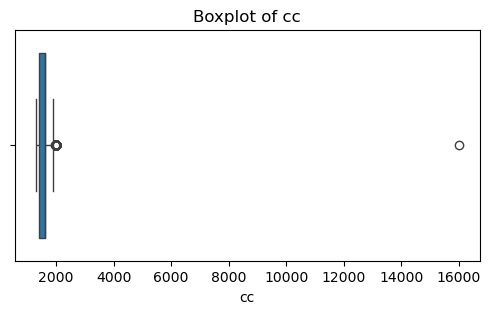

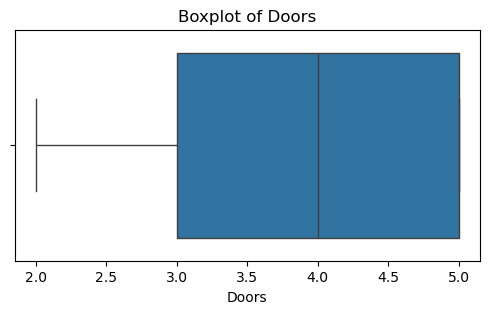

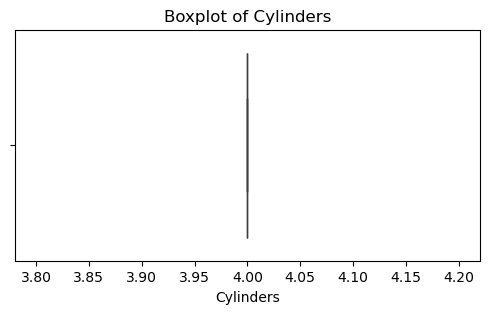

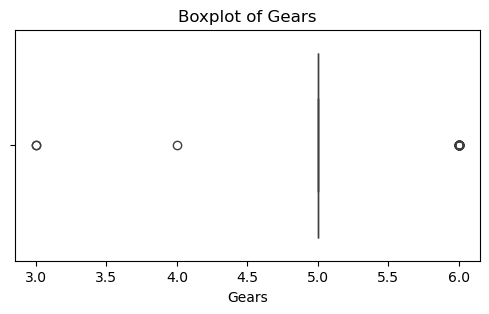

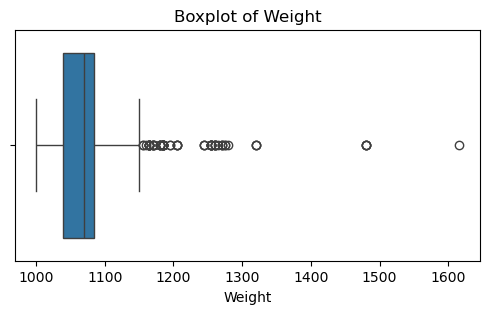

In [9]:
for col in mlr:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=mlr[col])
    plt.title(f'Boxplot of {col}')

plt.show()

#### Replacing outliers with median

In [10]:
mlr_imputed = mlr.copy()
num_cols = mlr_imputed.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols :
    Q1 = mlr_imputed[col].quantile(0.25)
    Q3 = mlr_imputed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = mlr_imputed[col].median()

    mlr_imputed.loc[(mlr_imputed[col] < lower_bound) | (mlr_imputed[col] > upper_bound), col] = median

mlr_imputed

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986.0,Diesel,90,0,1600,3,4,5,1070
1,13750,23,72937.0,Diesel,90,0,1600,3,4,5,1070
2,13950,24,41711.0,Diesel,90,0,1600,3,4,5,1070
3,14950,26,48000.0,Diesel,90,0,1600,3,4,5,1070
4,13750,30,38500.0,Diesel,90,0,1600,3,4,5,1070
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000.0,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016.0,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916.0,Petrol,86,0,1300,3,4,5,1015


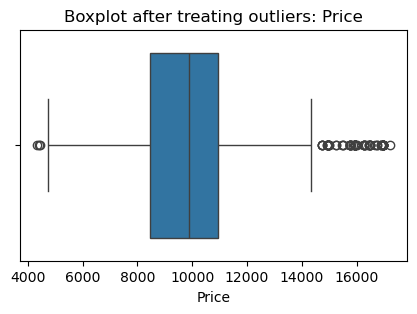

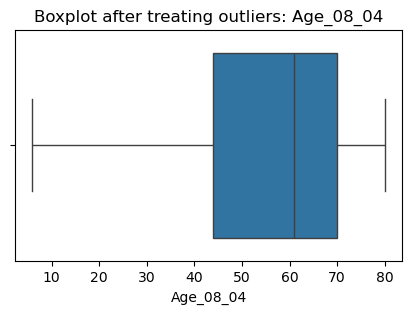

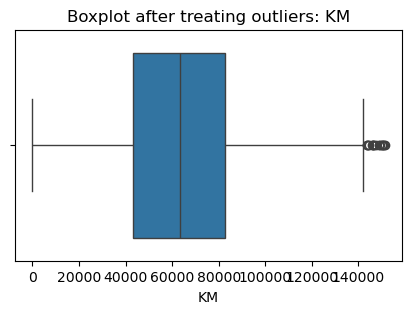

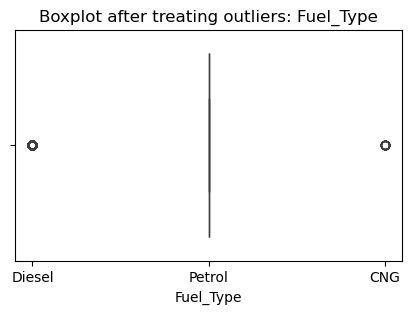

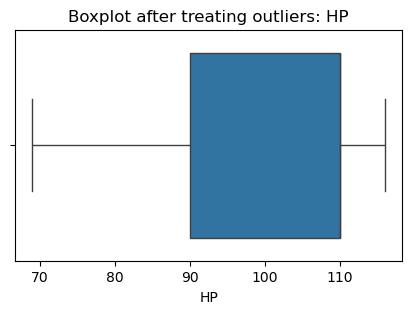

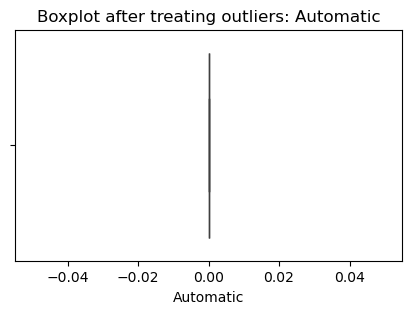

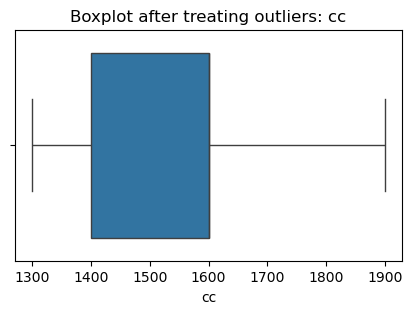

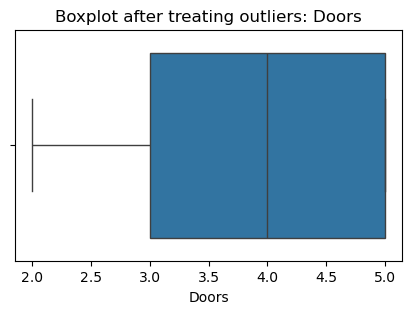

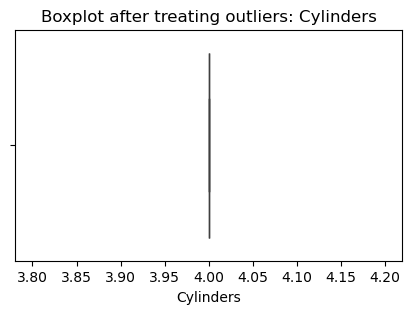

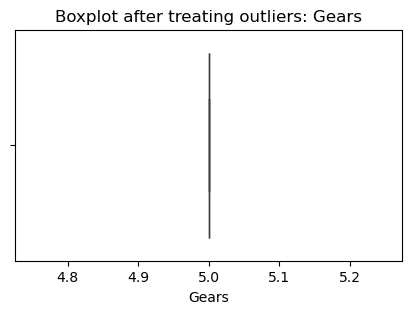

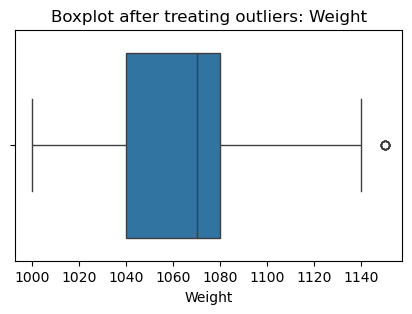

In [11]:
# after treating the outliers
for col in mlr:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=mlr_imputed[col])
    plt.title(f'Boxplot after treating outliers: {col}')
    plt.show()

#### 2.Statistical summary

In [12]:
stat_summary=pd.DataFrame({
    'Mean':mlr[data1].mean(),
    'Median':mlr[data1].median(),
    'standard_Deviation':mlr[data1].std(),
    'IQR': mlr[data1].quantile(0.75) - mlr[data1].quantile(0.25)
})

print(stat_summary)

                   Mean   Median  standard_Deviation       IQR
Price      10730.824513   9900.0         3626.964585   3500.00
Age_08_04     55.947075     61.0           18.599988     26.00
KM         68533.259749  63389.5        37506.448872  44020.75
HP           101.502089    110.0           14.981080     20.00
Automatic      0.055710      0.0            0.229441      0.00
cc          1576.855850   1600.0          424.386770    200.00
Doors          4.033426      4.0            0.952677      2.00
Cylinders      4.000000      4.0            0.000000      0.00
Gears          5.026462      5.0            0.188510      0.00
Weight      1072.459610   1070.0           52.641120     45.00


#### Convert Categorical Data to Numeric

In [13]:
mlr2=mlr.copy()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit_transform(mlr2['Fuel_Type'])

array([1, 1, 1, ..., 2, 2, 2])

In [16]:
mlr2.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [17]:
mlr2['Fuel_Type'] = le.fit_transform(mlr2['Fuel_Type'])

In [18]:
mlr2.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


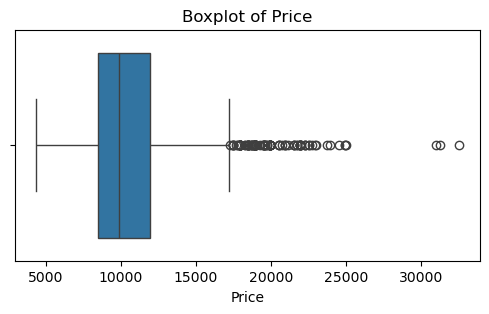

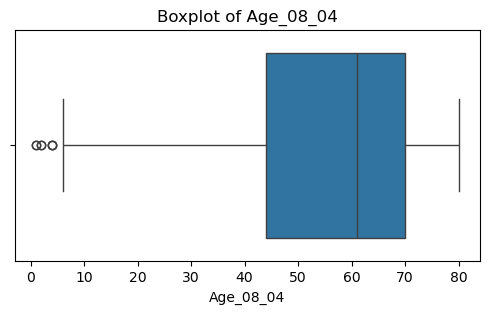

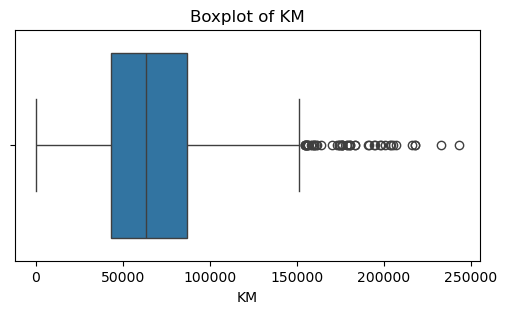

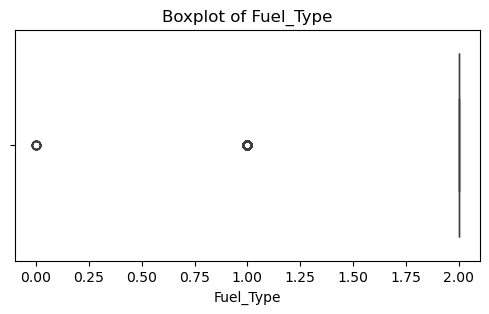

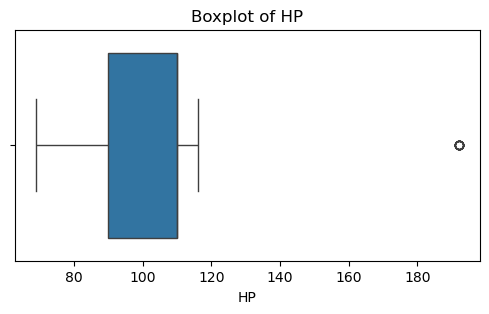

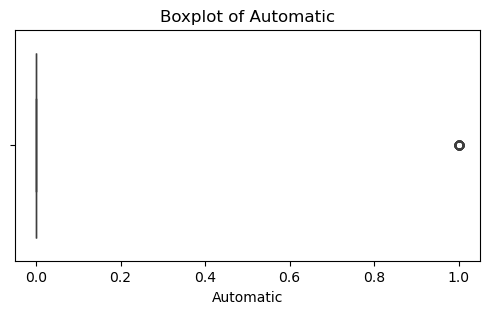

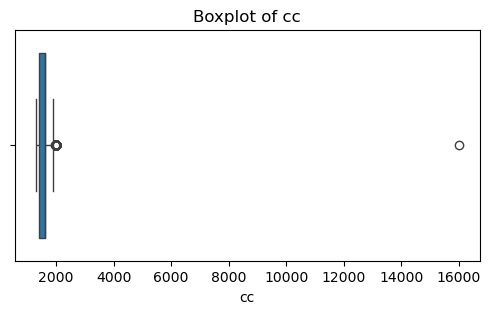

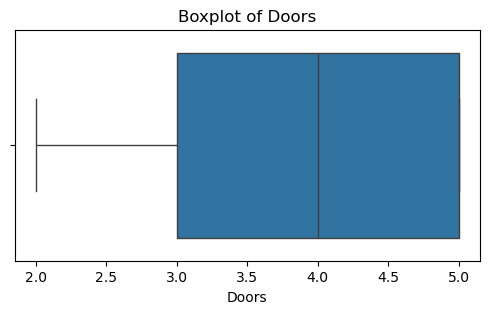

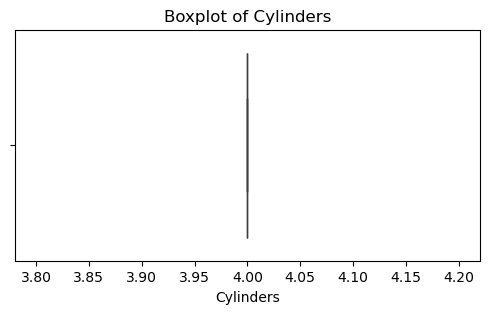

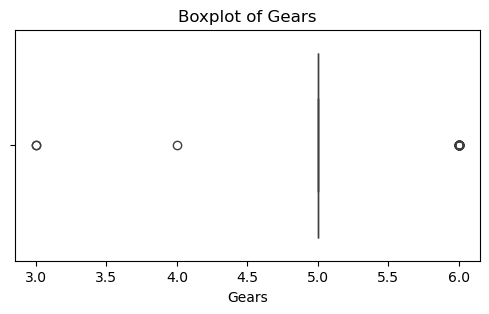

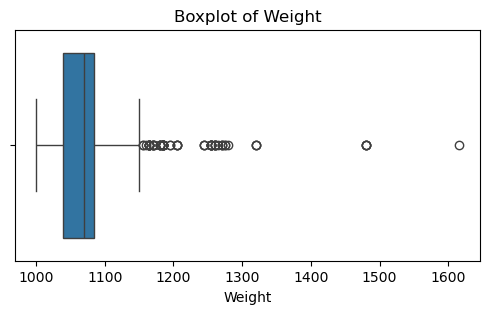

In [19]:
for col in mlr2:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=mlr2[col])
    plt.title(f'Boxplot of {col}')

plt.show()

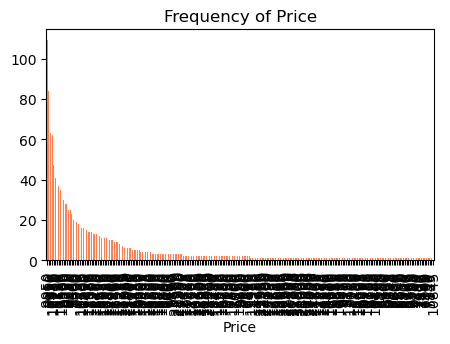

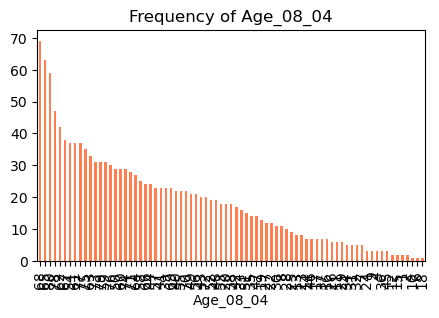

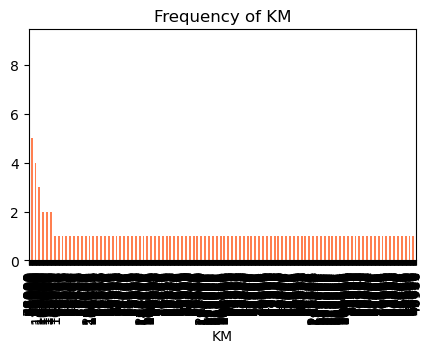

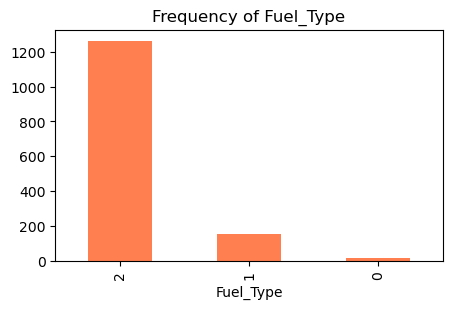

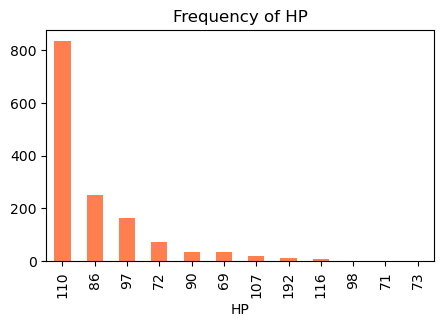

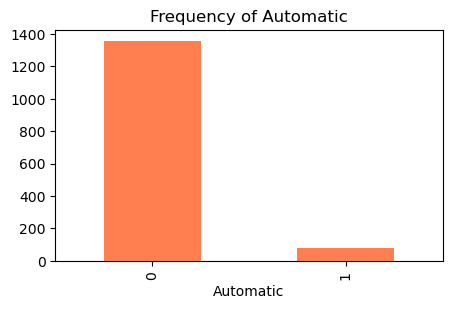

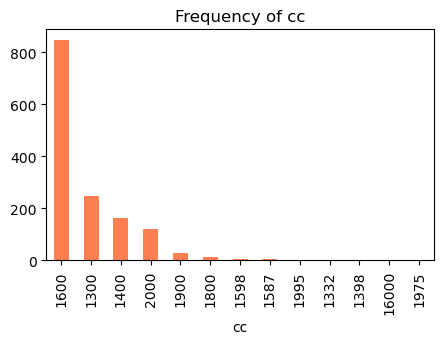

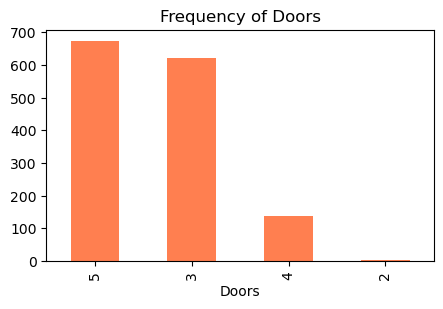

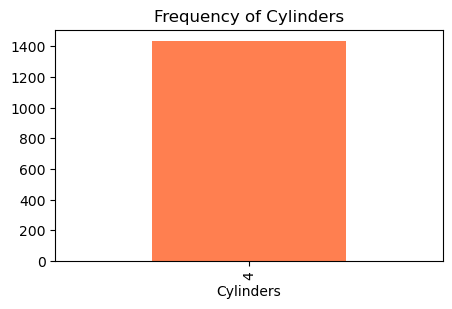

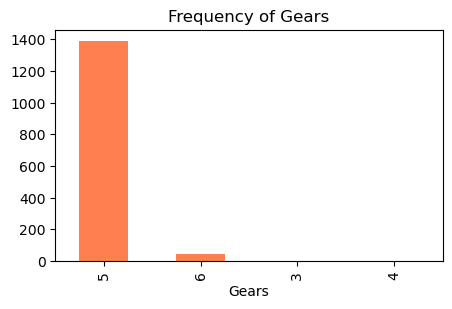

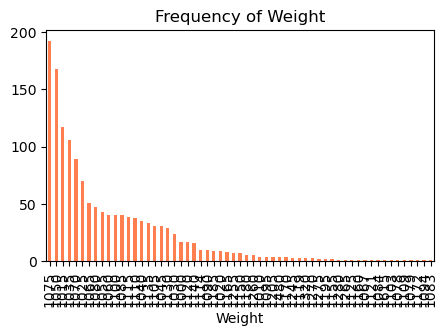

In [20]:
# Bar charts for categorical variables
for col in mlr2:
    plt.figure(figsize=(5, 3))
    mlr2[col].value_counts().plot(kind="bar", color="coral")
    plt.title(f"Frequency of {col}")
    plt.show()

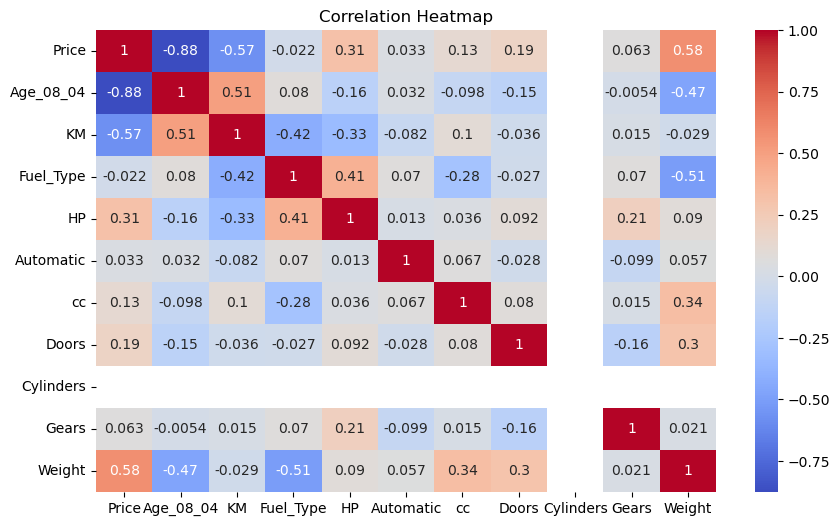

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mlr2.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#### Spliting the data into train and test

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=mlr.iloc[:,1:]
y=mlr.iloc[:,0]

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1148, 10), (288, 10), (1148,), (288,))

In [25]:
# Preprocessing Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
numeric_features = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight']
categorical_features = ['FuelType', 'Automatic']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


#### Building a model

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [43]:
# Baseline model model 1
basic_linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

basic_linear_model.fit(X_train, y_train)
y_pred_basic = basic_linear_model.predict(X_test)

# Evaluation
mse_basic = mean_squared_error(y_test, y_pred_basic)
rmse_basic = np.sqrt(mse_basic)
mae_basic = mean_absolute_error(y_test, y_pred_basic)
r2_basic = r2_score(y_test, y_pred_basic)

print("\n=== Model 1: Basic Multiple Linear Regression ===")
print(f"MSE: {mse_basic:.2f}, RMSE: {rmse_basic:.2f}, MAE: {mae_basic:.2f}, R²: {r2_basic:.3f}")


#Assumption:
#The relationship between each independent variable and the dependent variable is linear.

#Implication:
#If the true relationship is non-linear, the model will underfit the data and predictions will be inaccurate.

#In our analysis, Model 1 (Basic Linear Regression) assumes perfect linearity.

#To relax this, Model 3 (Polynomial Regression) introduces squared and interaction terms to better capture non-linear patterns.


=== Model 1: Basic Multiple Linear Regression ===
MSE: 1915753.64, RMSE: 1384.11, MAE: 1021.17, R²: 0.851


In [44]:
#model2
log_linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Log-transform target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

log_linear_model.fit(X_train, y_train_log)
y_pred_log = np.expm1(log_linear_model.predict(X_test))

# Evaluation
mse_log = mean_squared_error(y_test, y_pred_log)
rmse_log = np.sqrt(mse_log)
mae_log = mean_absolute_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

print("\n=== Model 2: Log-Transformed Target Regression ===")
print(f"MSE: {mse_log:.2f}, RMSE: {rmse_log:.2f}, MAE: {mae_log:.2f}, R²: {r2_log:.3f}")
# Assumption:
#Residuals (differences between predicted and actual values) are normally distributed.

#Implication:
#Non-normal residuals affect the accuracy of confidence intervals and hypothesis tests.

#The log transformation in Model B helps reduce skewness and improve normality.

#For Model 3, residuals should still be checked for normality even after including polynomial terms.


=== Model 2: Log-Transformed Target Regression ===
MSE: 1329152.33, RMSE: 1152.89, MAE: 894.64, R²: 0.896


In [45]:
# model 3
poly_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),
        ('poly', PolynomialFeatures(degree=2, include_bias=False), numerical_columns)
    ]
)

poly_regression_model = Pipeline(steps=[
    ('preprocessor', poly_preprocessor),
    ('regressor', LinearRegression())
])

poly_regression_model.fit(X_train, y_train)
y_pred_poly = poly_regression_model.predict(X_test)

# Evaluation
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\n=== Model 3: Polynomial Regression (Degree 2) ===")
print(f"MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}, MAE: {mae_poly:.2f}, R²: {r2_poly:.3f}")

#Assumption:
#Independent variables are not highly correlated with each other.

#Implication:
#High multicollinearity inflates the variance of coefficient estimates, making them unstable and hard to interpret.

#Polynomial models (Model C) and one-hot encoding can increase multicollinearity risk.

#Checking VIF (Variance Inflation Factor) is recommended to confirm that predictors are not excessively correlated.


=== Model 3: Polynomial Regression (Degree 2) ===
MSE: 1267488.05, RMSE: 1125.83, MAE: 879.73, R²: 0.901


#### MOdel comparassion summary

In [46]:
results = pd.DataFrame({
    'Model': ['Basic Linear Regression', 'Log-Transformed Regression', 'Polynomial Regression (Degree 2)'],
    'MSE': [mse_basic, mse_log, mse_poly],
    'RMSE': [rmse_basic, rmse_log, rmse_poly],
    'MAE': [mae_basic, mae_log, mae_poly],
    'R²': [r2_basic, r2_log, r2_poly]
})
print("\n=== Model Comparison Summary ===")
print(results)



=== Model Comparison Summary ===
                              Model           MSE         RMSE          MAE  \
0           Basic Linear Regression  1.915754e+06  1384.107526  1021.167824   
1        Log-Transformed Regression  1.329152e+06  1152.888690   894.635725   
2  Polynomial Regression (Degree 2)  1.267488e+06  1125.827717   879.727253   

         R²  
0  0.850624  
1  0.896363  
2  0.901171  


#### Intrepretation of coefficients

In [47]:
# --- Model A Coefficients ---
reg_basic = basic_linear_model.named_steps['regressor']
encoded_features_basic = basic_linear_model.named_steps['preprocessor'].get_feature_names_out()

coef_basic = pd.DataFrame({
    'Feature': encoded_features_basic,
    'Coefficient': reg_basic.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n=== Coefficient Interpretation – Basic Linear Regression ===")
print(coef_basic)

# --- Model B Coefficients ---
reg_log = log_linear_model.named_steps['regressor']
encoded_features_log = log_linear_model.named_steps['preprocessor'].get_feature_names_out()

coef_log = pd.DataFrame({
    'Feature': encoded_features_log,
    'Coefficient': reg_log.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n=== Coefficient Interpretation – Log-Transformed Regression ===")
print(coef_log)

# --- Model C Coefficients ---
reg_poly = poly_regression_model.named_steps['regressor']
encoded_features_poly = poly_regression_model.named_steps['preprocessor'].get_feature_names_out()

coef_poly = pd.DataFrame({
    'Feature': encoded_features_poly,
    'Coefficient': reg_poly.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n=== Coefficient Interpretation – Polynomial Regression (Degree 2) ===")
print(coef_poly)



=== Coefficient Interpretation – Basic Linear Regression ===
                  Feature   Coefficient
1   cat__Fuel_Type_Petrol  8.922800e+02
0   cat__Fuel_Type_Diesel  8.554292e+02
9        remainder__Gears  7.756525e+02
5    remainder__Automatic  4.567576e+02
4           remainder__HP  2.941787e+01
7        remainder__Doors  2.732872e+01
10      remainder__Weight  1.570087e+01
8    remainder__Cylinders  1.449507e-12
6           remainder__cc -1.533367e-02
3           remainder__KM -1.680736e-02
2    remainder__Age_08_04 -1.294809e+02

=== Coefficient Interpretation – Log-Transformed Regression ===
                  Feature   Coefficient
9        remainder__Gears  8.292819e-02
5    remainder__Automatic  4.643797e-02
0   cat__Fuel_Type_Diesel  4.638432e-02
1   cat__Fuel_Type_Petrol  3.952792e-02
7        remainder__Doors  1.056670e-02
4           remainder__HP  2.135020e-03
10      remainder__Weight  8.627070e-04
6           remainder__cc  1.180948e-06
8    remainder__Cylinders  1.4918

#### Lasso and Ridge methods on the model.

In [ ]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
lasso = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LassoCV(cv=5, random_state=42))])

ridge = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RidgeCV(cv=5))])

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

print("\n=== Lasso Regression ===")
print("Best Alpha:", lasso.named_steps['regressor'].alpha_)
print("R²:", r2_score(y_test, y_pred_lasso))

print("\n=== Ridge Regression ===")
print("Best Alpha:", ridge.named_steps['regressor'].alpha_)
print("R²:", r2_score(y_test, y_pred_ridge))

#### Interview Questions

In [ ]:
# Normalization
